In [3]:
#Load all the required python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [4]:
#Importing the data
df = pd.read_csv("https://raw.githubusercontent.com/sAKHILAREDDY/DATA606_Akhila/main/Suicide%20Rates%20Overview%201985%20to%202016%20Data.csv")

In [5]:
#To find the number of rows and columns in the DF
df.shape 

(27820, 12)

In [6]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
#renaming the column names for convenience
df.columns = ['country', 'year', 'gender', 'age', 'suicide_count', 'population', 'suicide_rate', 'country-year', 'HDI_for_year',
                'gdp_for_year', 'gdp_per_capita', 'generation']

In [8]:
#To get some overview of the data, To find if there are any null values- #HDI for year column contains null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI_for_year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [9]:
df.describe()

,year,suicide_count,population,suicide_rate,HDI_for_year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [10]:
#To find duplicate values - Since there are no rows in duplicate dataframe, it exists no duplicates
duplicate = df[df.duplicated()]
duplicate

,country,year,gender,age,suicide_count,population,suicide_rate,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation


In [11]:
#To drop unwanted columns
df1=df.drop(['country-year','HDI_for_year'], axis = 1) 

In [12]:
df1['gdp_for_year'] = df1['gdp_for_year'].str.replace(',','').astype(float) #To convert the column into float

In [13]:
df1['row_num'] = df1.reset_index().index
df1

,country,year,gender,age,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation,row_num
0,Albania,1987,male,15-24 years,21,312900,6.71,2.156625e+09,796,Generation X,0
1,Albania,1987,male,35-54 years,16,308000,5.19,2.156625e+09,796,Silent,1
2,Albania,1987,female,15-24 years,14,289700,4.83,2.156625e+09,796,Generation X,2
3,Albania,1987,male,75+ years,1,21800,4.59,2.156625e+09,796,G.I. Generation,3
4,Albania,1987,male,25-34 years,9,274300,3.28,2.156625e+09,796,Boomers,4
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,6.306708e+10,2309,Generation X,27815
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,6.306708e+10,2309,Silent,27816
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,6.306708e+10,2309,Generation Z,27817
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,6.306708e+10,2309,Generation Z,27818


In [14]:
#Checking number of unique categories for categorical variables
df1.age.value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64

In [15]:
df1.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [16]:
#listing countries 
df1.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [17]:
#To know the number of unique countries
len(df1.country.unique()) 

101

# **Plots to display how data is distributed**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f980e4055b0>,
      dtype=object)

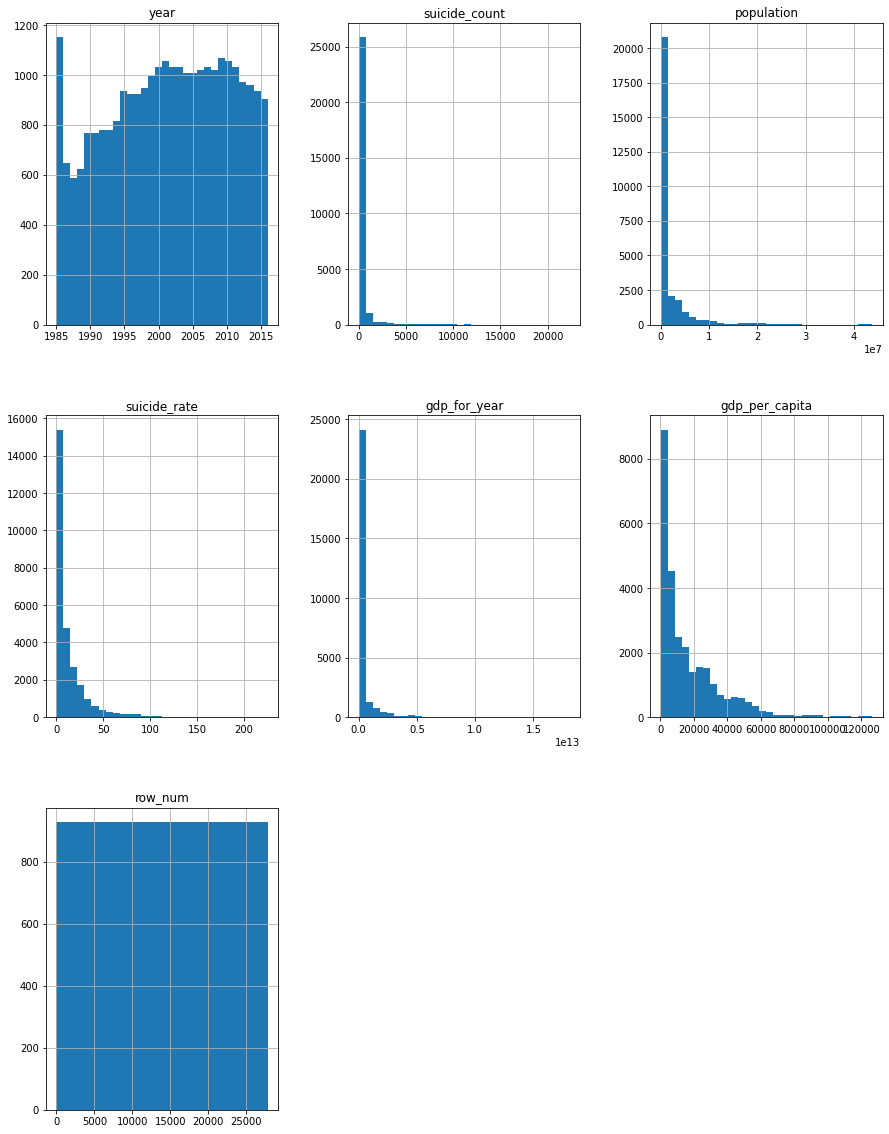

In [18]:
df1.hist(bins = 30,figsize = (15,20))

# Exploratory Data Analaysis:

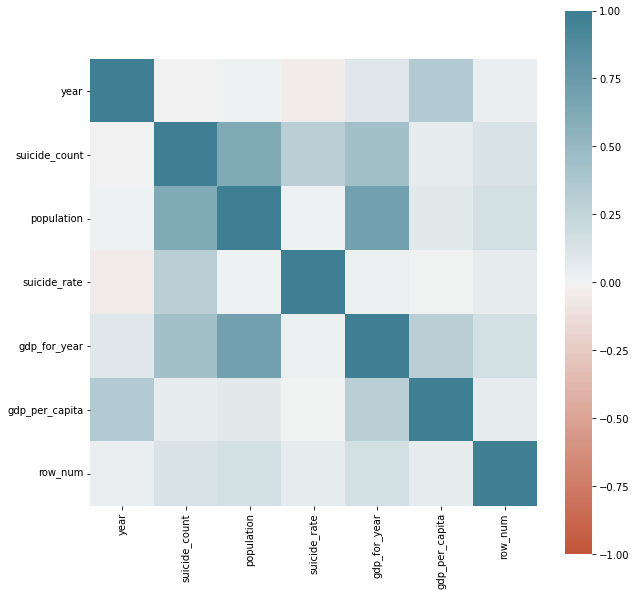

In [19]:
#Correlation heatmap

suicide_corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(suicide_corr, 
    xticklabels = suicide_corr.columns.values, # x labels
    yticklabels = suicide_corr.columns.values, # y labels
    vmin = -1, # color scale the min value
    vmax = 1, # color scale the max
    center = 0, # color scale place at the center at 0
    cmap = sns.diverging_palette(20, 220, n = 200), # color palette
    square = True) # each cell will be square-shaped
plt.show()

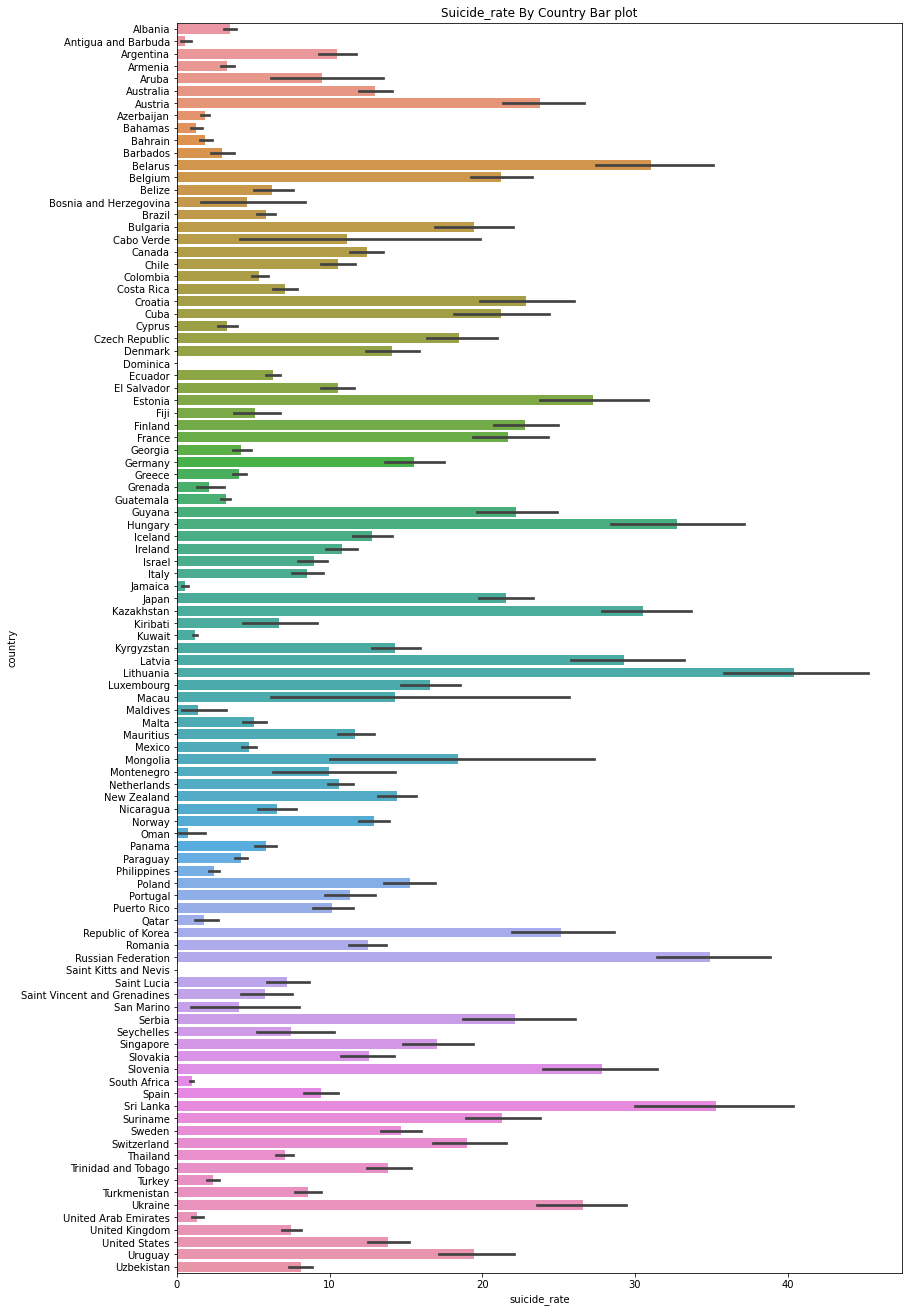

In [24]:
#Suicide_rate bar plot as per country

plt.figure(figsize=(13,23))
sns.barplot(x = "suicide_rate", y = "country", data = df)
plt.title('Suicide_rate By Country Bar plot')
plt.show()

The above bar plot depicts that Lithuania has the highest suicide rate followed by Sri Lanka. Dominica, Saint Kitts and Nevis have the lowest suicide rates.

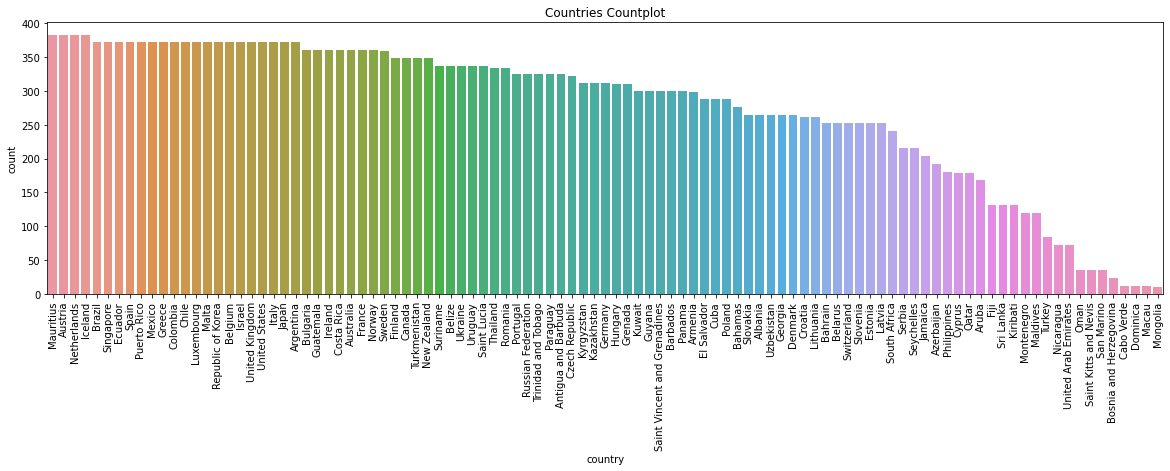

In [25]:
#Suicide Count bar plot as per country

plt.figure(figsize=(20, 5))
sns.countplot(df['country'], order=df['country'].value_counts().index)
plt.title("Countries Countplot")
plt.xticks(rotation=90)
plt.show()

The highest suicide count is in Mauritius whereas the lowest suicide count is in Mongolia


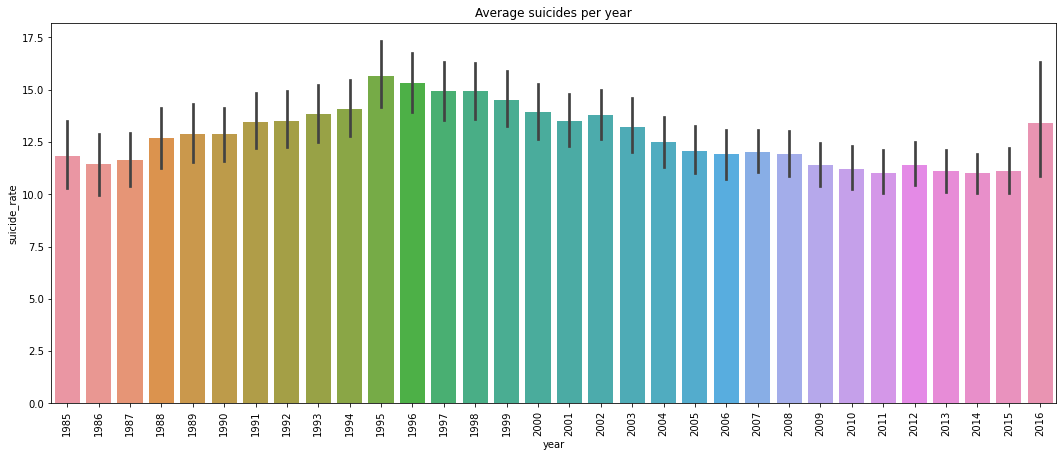

In [26]:
# Average suicides per year
plt.figure(figsize=(18, 7))
sns.barplot(df['year'], df['suicide_rate'])
plt.title("Average suicides per year")
plt.xticks(rotation=90)
plt.show()

Sucides per year were the highest in 1995.

Text(0, 0.5, 'suicide_count')

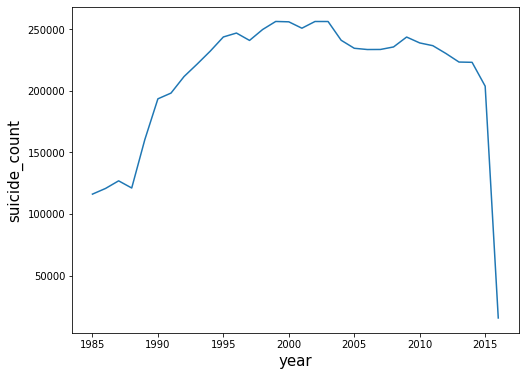

In [27]:
#Suicides over the years 
ns = df['suicide_count'].groupby(df.year).sum()
ns.plot(figsize=(8,6))
plt.xlabel('year', fontsize=15)
plt.ylabel('suicide_count',fontsize=15)

The annual trend in the number of suicides is examined. As shown in the graph below, suicide rates have consistently increased over time. After a few dips in 1997 and a continuous reduction from 2002 to 2008, the rate increases and then drops from 2009 to 2015.

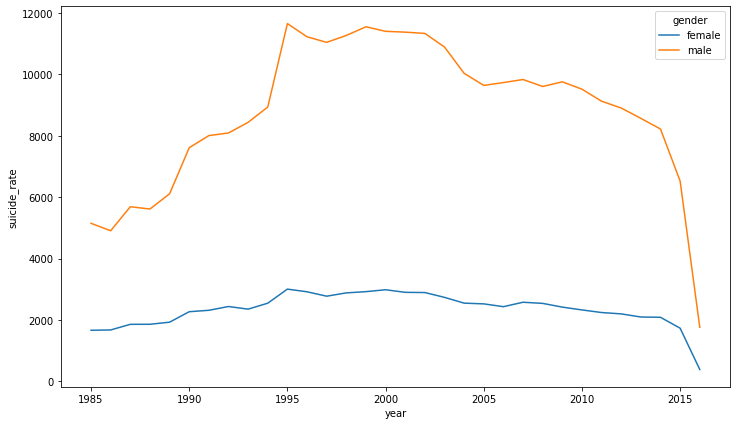

In [30]:
#Suicide rate trend over the years - based on gender
sort_by_year = df.groupby (['year','gender'])['suicide_rate'].sum().reset_index()
plt.figure(figsize=(12,7))
sns.lineplot (x = 'year', y = 'suicide_rate', hue = 'gender' ,data = sort_by_year)

Suicide rate in Male has always been the hightest when compared to Female over the years.

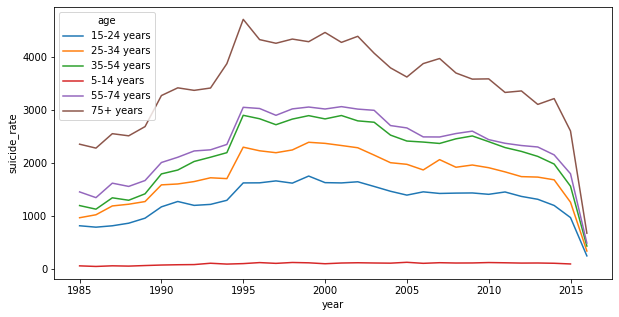

In [31]:
#Suicide rate trend over the years - based on age
sort_by_age = df.groupby (['year', 'age'])['suicide_rate'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot (x = 'year', y = 'suicide_rate', hue = 'age' ,data = sort_by_age)

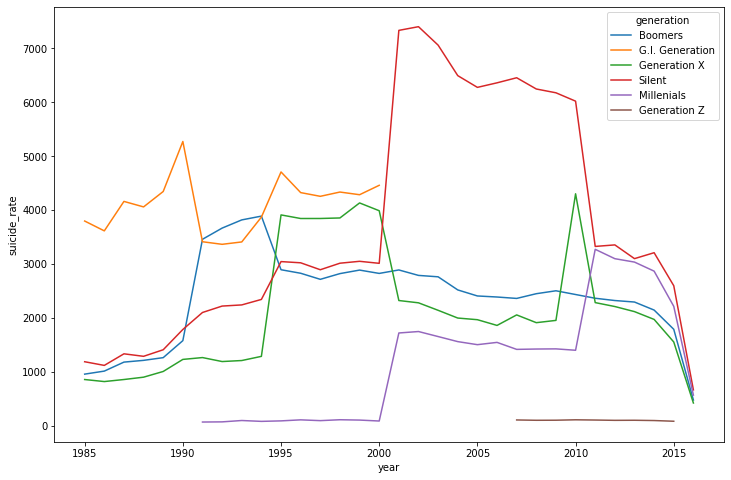

In [32]:
#Suicide rate trend over the years - based on generation
sort_by_gen = df.groupby (['year', 'generation'])['suicide_rate'].sum().reset_index()
plt.figure(figsize=(12,8))
sns.lineplot (x = 'year', y = 'suicide_rate', hue = 'generation' ,data = sort_by_gen)

In [34]:
#Suicides per generation 
suicides_no_gen = df1.groupby('generation', as_index = False)['suicide_count'].sum()
suicides_no_gen.rename(columns = {'generation': 'generation', 'suicide_count':'No_of_suicides_in_particular_generation'}, inplace = True)
suicides_no_gen.head()

,generation,No_of_suicides_in_particular_generation
0,Boomers,2284498
1,G.I. Generation,510009
2,Generation X,1532804
3,Generation Z,15906
4,Millenials,623459


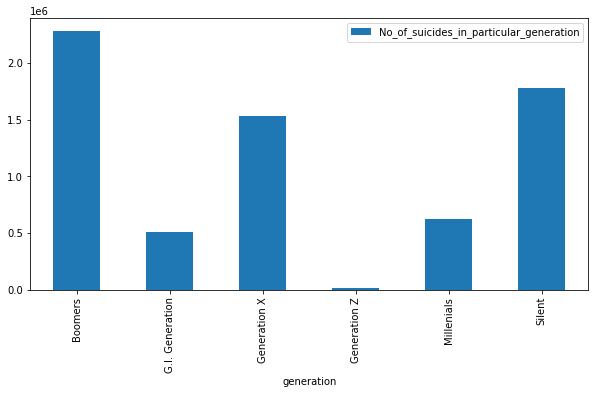

In [35]:
suicides_no_gen.plot.bar(x='generation', y='No_of_suicides_in_particular_generation', figsize=(10, 5))

The above bar graph indicates that Boomers generation has the highest number of suicides while the Generation Z has the lowest number of suicides.

In [37]:
#Suicides per age group
suicides_no_age = df1.groupby('age', as_index = False)['suicide_count'].sum()
suicides_no_age.rename(columns = {'age': 'age', 'suicide_count':'No_of_suicides_in_particular_agegroup'}, inplace = True)
suicides_no_age.head()

,age,No_of_suicides_in_particular_agegroup
0,15-24 years,808542
1,25-34 years,1123912
2,35-54 years,2452141
3,5-14 years,52264
4,55-74 years,1658443


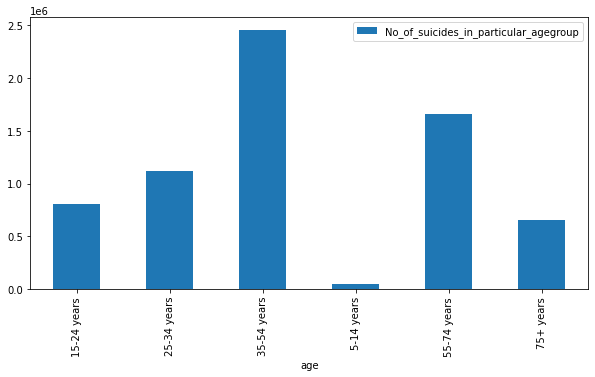

In [38]:
suicides_no_age.plot.bar(x='age', y='No_of_suicides_in_particular_agegroup', figsize=(10, 5))

According to the above bar graph, those in the 35-54 year age group commit the most suicides, while those in the 5-14 year age group commit the fewest.

In [41]:
#Suicides per gender
suicides_no_sex = df1.groupby('gender', as_index = False)['suicide_count'].sum()
suicides_no_sex.rename(columns = {'gender': 'gender', 'suicide_count':'No_of_suicides_in_particular_sex'}, inplace = True)
suicides_no_sex.head()

,gender,No_of_suicides_in_particular_sex
0,female,1559510
1,male,5188910


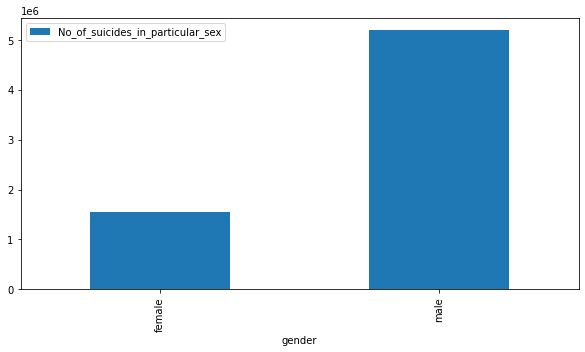

In [42]:
suicides_no_sex.plot.bar(x='gender', y='No_of_suicides_in_particular_sex', figsize=(10, 5))

The above bar graph clearly shows that the number of male suicides is significantly higher than the number of female suicides.

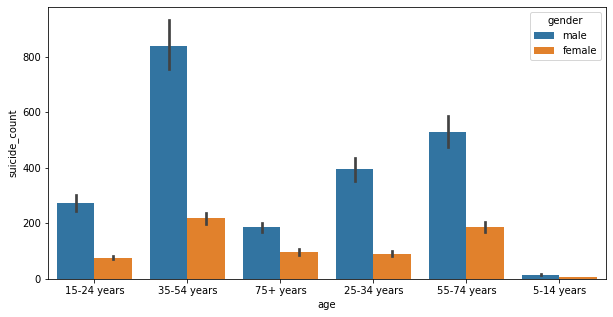

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x = "age", y = "suicide_count", hue = "gender", data = df1)
plt.show()

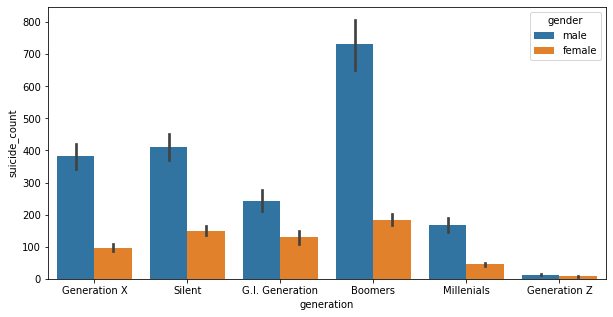

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x = "generation", y = "suicide_count", hue = "gender", data = df1)
plt.show()

The above two graphs help us understand that men commit suicide at a much higher rate than women, regardless of their age or generation.

In [45]:
suicides_no_country = df1.groupby(['year', 'country'], as_index = False)['suicide_count'].sum()
suicides_no_country.rename(columns = {'country': 'country', 'suicide_count':'No_of_suicides_in_the_country'}, inplace = True)
suicides_no_country.head()

,year,country,No_of_suicides_in_the_country
0,1985,Antigua and Barbuda,0
1,1985,Argentina,1988
2,1985,Australia,1861
3,1985,Austria,2091
4,1985,Bahamas,1


In [46]:
import plotly.express as px
fig = px.scatter(
    suicides_no_country,
    x="year",
    y="country",
    labels={"year":"year",
            "country":"country"},
    title="No of suicides in a country in a particular year",
    color='country',
    size='No_of_suicides_in_the_country',
    hover_name='country',
    size_max=50
)
fig.update_layout(
    showlegend=True
)
fig.update_traces(textposition ="top center")
fig.show()

The number of suicides in a country in an year is depicted in the above bubble graph. Hovering over a bubble reveals how many suicides occurred in a given country in a given year. Colors are used to differentiate the countries.

The highest number of suicides in a particular year is in Russain Federation in 1994 with 61420 suicides.

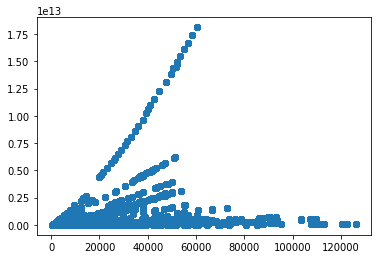

In [48]:
plt.scatter(df1['gdp_per_capita'],df1['gdp_for_year'])

The scatter plot above shows that several nations have a high GDP per capita yet a low GDP per year. One probable cause for this situation is when wealth is not distributed properly.

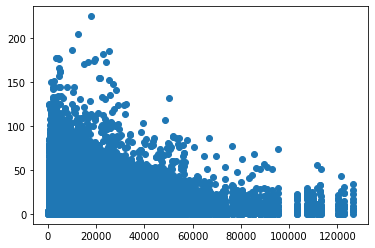

In [50]:
plt.scatter(df1['gdp_per_capita'],df1['suicide_rate'])

It can be generalised from the above scatter plot that countries with low GDP per capita can have high suicide rates and countries with high GDP per capita can have low suicide rates.

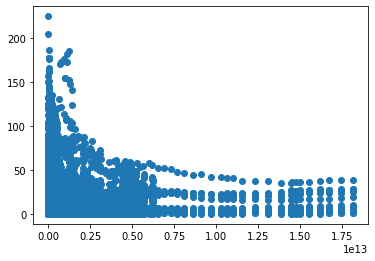

In [51]:
plt.scatter(df1['gdp_for_year'],df1['suicide_rate'])

The relationship between GDP per capita and GDP per year with suicide rate seem to be the same on the basis of above two scatterplots.

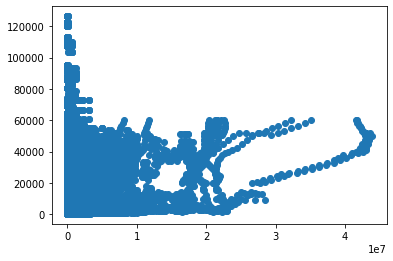

In [52]:
plt.scatter(df1['population'],df1['gdp_per_capita'])

From the above scatter plot we can come to a conclusion that often countries with less population tend to have higher GDP per capita when compared with countries with high population.

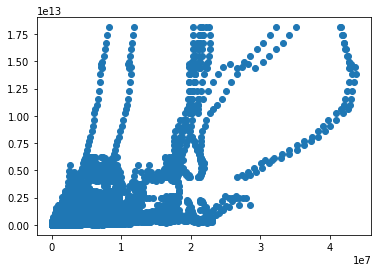

In [54]:
plt.scatter(df1['population'],df1['gdp_for_year'])

We can see from the scatter plot above that few countries with a low population and high population have high GDP. Similarly , few countries with a low population and high population have low GDP too. There does not appear to be any sort of pattern.